<a href="https://colab.research.google.com/github/WLMaia/trabalhoam/blob/main/trabalhoam_cod01_v01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
arquivo = pd.read_csv('https://raw.githubusercontent.com/WLMaia/trabalhoam/main/dataset/Arq_16_v1.csv', delimiter=';', on_bad_lines='skip')

arquivo = arquivo[['appName','protocolName','destinationPort','Tag']]
arquivo.head()

,appName,protocolName,destinationPort,Tag
0,Unknown_UDP,udp_ip,5353,Normal
1,HTTPImageTransfer,tcp_ip,80,Normal
2,DNS,udp_ip,53,Normal
3,HTTPImageTransfer,tcp_ip,80,Normal
4,HTTPImageTransfer,tcp_ip,80,Normal


In [10]:
len(arquivo.index)


171380

Normal    167604
Attack      3776
Name: Tag, dtype: int64


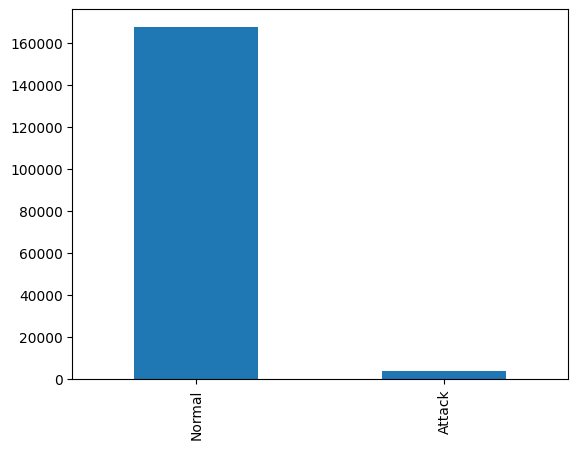

In [11]:
arquivo['Tag'].value_counts().plot.bar()
print(arquivo['Tag'].value_counts())

In [12]:
print(arquivo['appName'].value_counts())
print('--------------')
print(arquivo['protocolName'].value_counts())
print('--------------')
print(arquivo['Tag'].value_counts())
print('--------------')

HTTPWeb              56086
HTTPImageTransfer    48068
DNS                  36513
SecureWeb             8354
Unknown_UDP           6172
                     ...  
Citrix                   3
NortonGhost              2
GuptaSQLBase             1
Nessus                   1
Kazaa                    1
Name: appName, Length: 95, dtype: int64
--------------
tcp_ip     122298
udp_ip      48453
icmp_ip       623
igmp            4
ip              2
Name: protocolName, dtype: int64
--------------
Normal    167604
Attack      3776
Name: Tag, dtype: int64
--------------


In [13]:
from sklearn import preprocessing
enc = preprocessing.OrdinalEncoder()
enc.fit(arquivo[['appName','protocolName','destinationPort']])
X_encoded = enc.transform(arquivo[['appName','protocolName','destinationPort']])
X_encoded

array([[8.00e+01, 4.00e+00, 5.38e+02],
       [1.80e+01, 3.00e+00, 2.80e+01],
       [8.00e+00, 4.00e+00, 2.30e+01],
       ...,
       [8.00e+01, 4.00e+00, 2.57e+03],
       [7.90e+01, 3.00e+00, 4.50e+03],
       [7.90e+01, 3.00e+00, 4.50e+03]])

In [14]:
from sklearn.model_selection import train_test_split

# Dividir o dataset em atributos e classe

#X = arquivo[['appName','protocolName','destinationPort']] # Features
X = X_encoded
y = arquivo.Tag # Target variable

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [15]:
X_train[:5]

array([[1.900e+01, 3.000e+00, 2.800e+01],
       [8.700e+01, 4.000e+00, 4.900e+01],
       [1.000e+01, 3.000e+00, 1.100e+01],
       [8.000e+01, 4.000e+00, 5.405e+03],
       [8.000e+00, 4.000e+00, 2.300e+01]])

In [16]:
from sklearn.tree import DecisionTreeClassifier
import time

arvore = DecisionTreeClassifier(random_state=0)
# Fazer o treinamento - sem modificar os parâmetros
start_time = time.time()
arvore.fit(X_train,y_train)
time_arvore = time.time() - start_time

print("Tempo de Construção: ", time_arvore)
print("Níveis da Árvore: ", arvore.get_depth())
print("Folhas: ", arvore.get_n_leaves())

Tempo de Construção:  0.5228748321533203
Níveis da Árvore:  19
Folhas:  99


In [17]:
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt

# Realizar as predições na árvore (modelo treinado)
y_pred = arvore.predict(X_test)

# Verificar a acurácia
acuracia = metrics.accuracy_score(y_test, y_pred)
print("Acurácia:", str(round(acuracia * 100, 8)), "%")

print(metrics.classification_report(y_test, y_pred))

Acurácia: 98.60543821 %
              precision    recall  f1-score   support

      Attack       0.98      0.37      0.53      1120
      Normal       0.99      1.00      0.99     50294

    accuracy                           0.99     51414
   macro avg       0.98      0.68      0.76     51414
weighted avg       0.99      0.99      0.98     51414



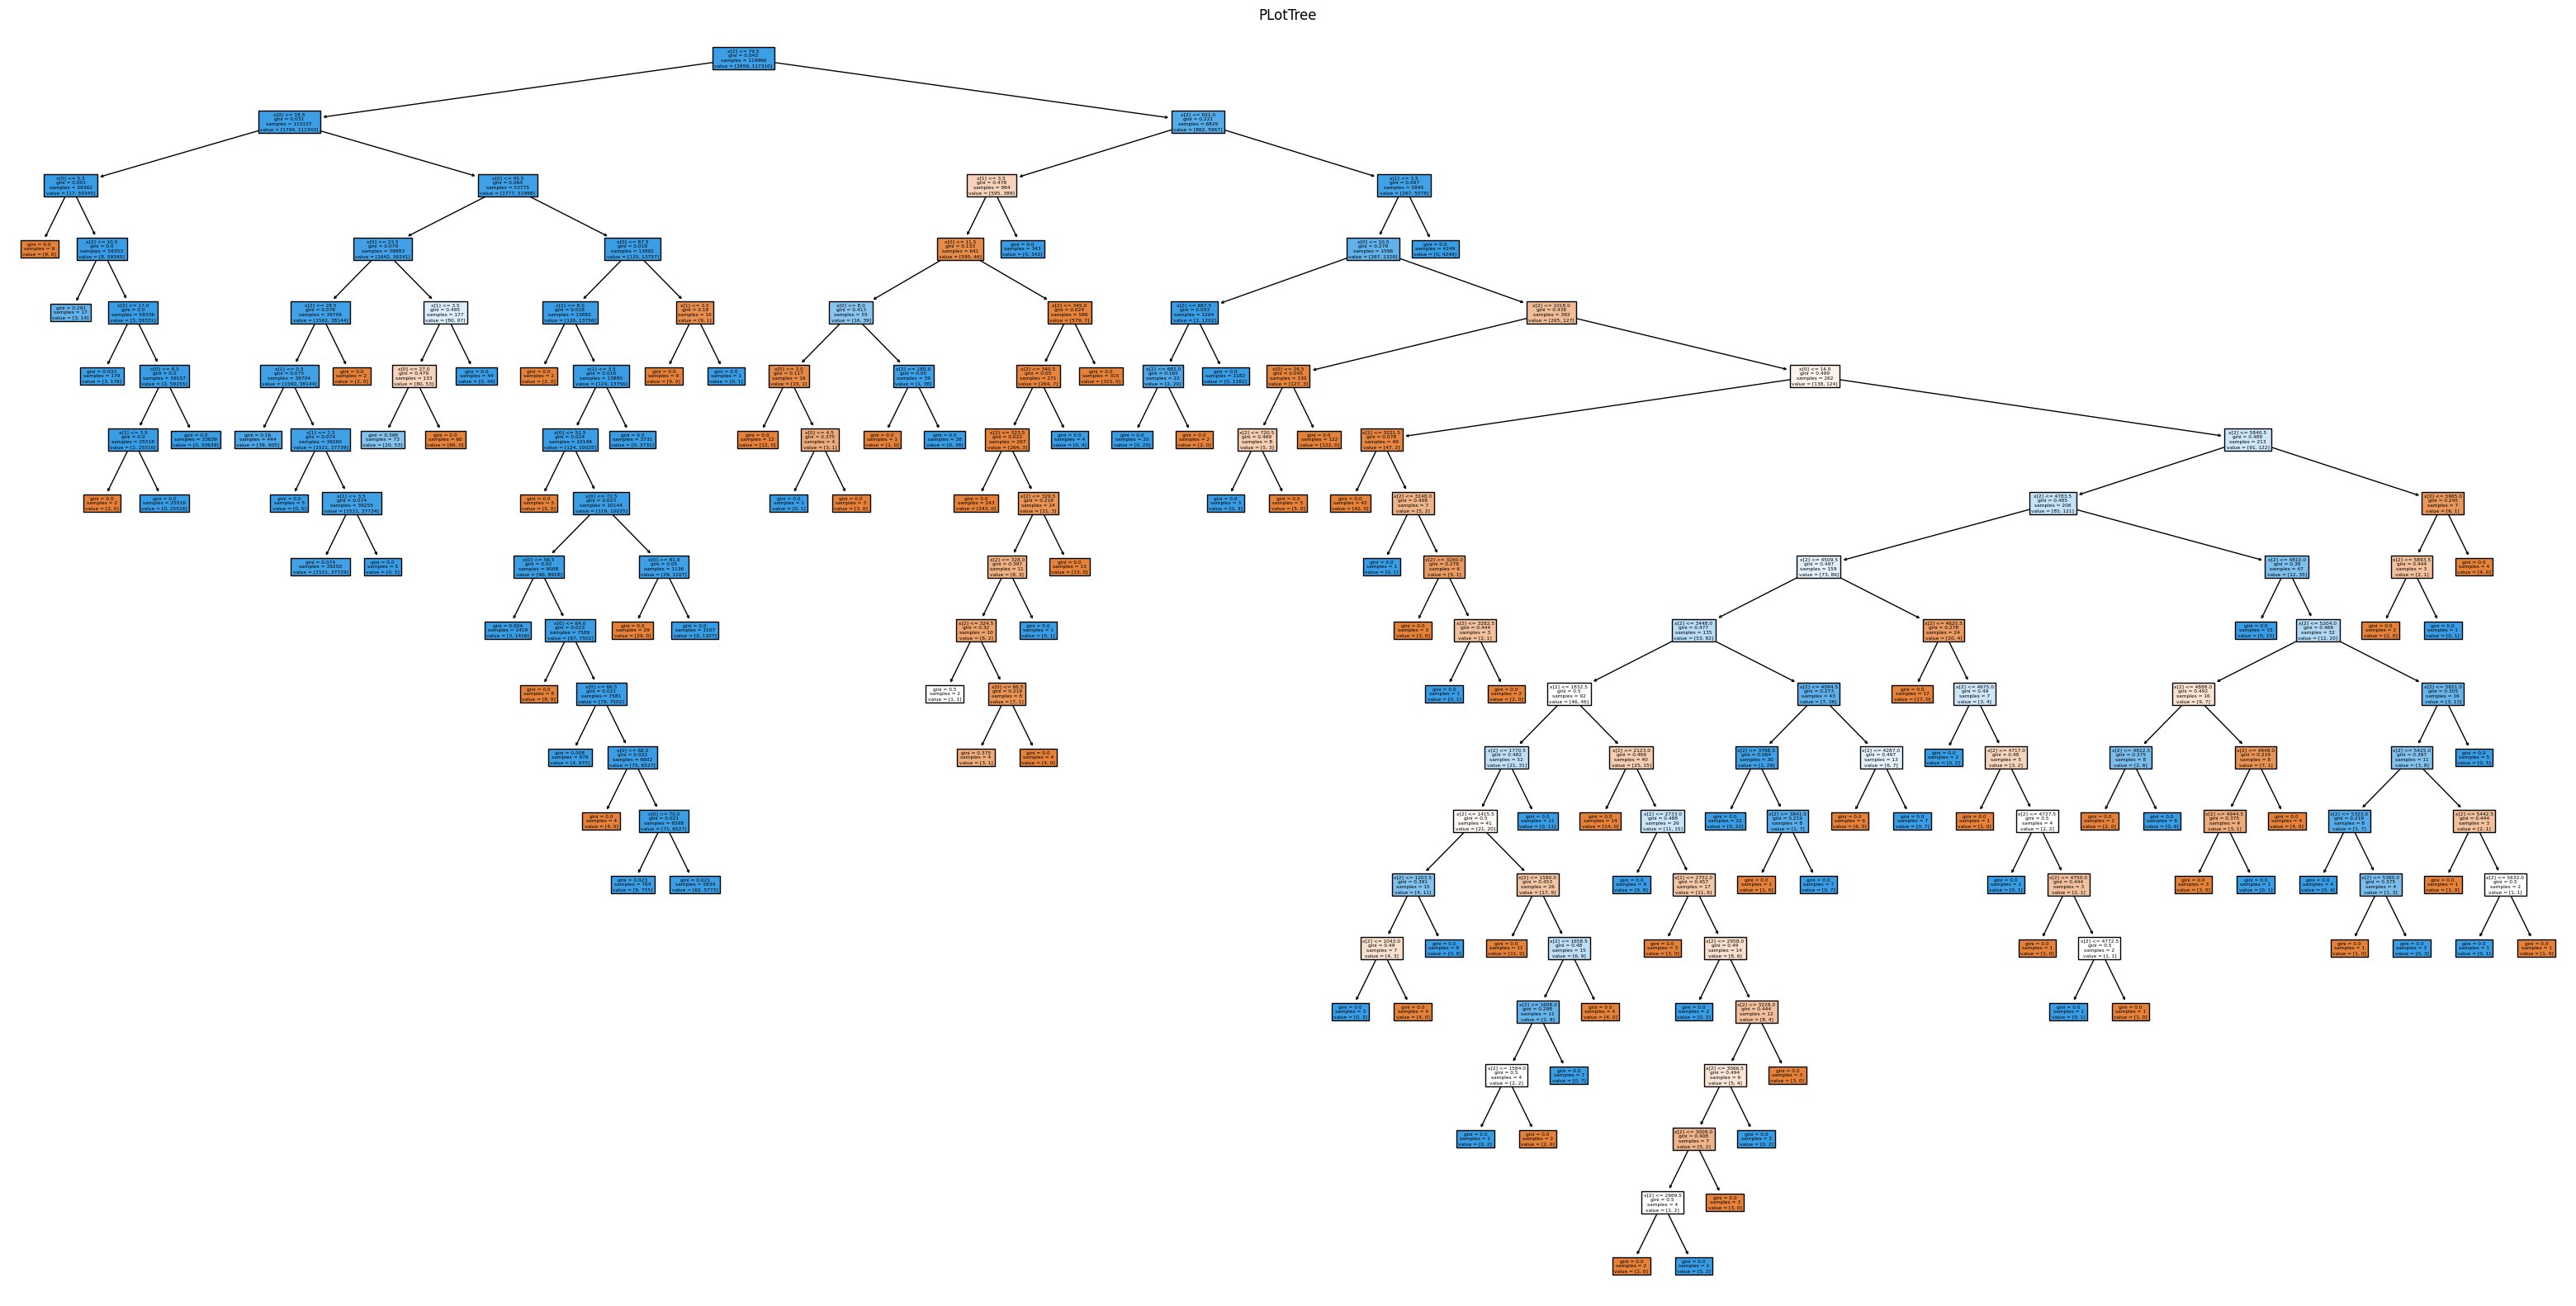

In [18]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_size_inches(40, 20)
fig.savefig('test2png.png', dpi=150)
plot_tree(arvore, filled=True)
plt.title("PLotTree")
plt.show()